# Project: make some analysis form imdb data set movies

<a id='intro'></a>
## Introduction

> We will work with a data set from imdb database site the data contain many columns (tagline,vote_count,revenu,etc)
my questions is what is the most voted movie and geners? did runtime effect the vote_average or not  ?

In [28]:
#imported  required liberaries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [29]:
#reading the input data from the file 
df = pd.read_csv('tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [30]:
#show number of columns and rows in the data set 
df.shape

(10866, 21)

In [31]:
#show more detials about the columns e.g(homepage ,tagline,production_companies,keywords have a null entries)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> here we use a describe to to show some basic estatistics to uor data if we see the runtime column (vote_count:pandent variable) the first 25% from the movies the most average voted data are in the 3Q in the data set ,(release_year:inpandent variable) as we see the 3Q from the movie in the data are release after 2011 vote average : this column is usefull every movie average rate or vote which mean if the move was good or not we can find the best time and the season in the year for Announcing the movie show time. 

In [32]:
#here we describe some statistics to know much info about the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


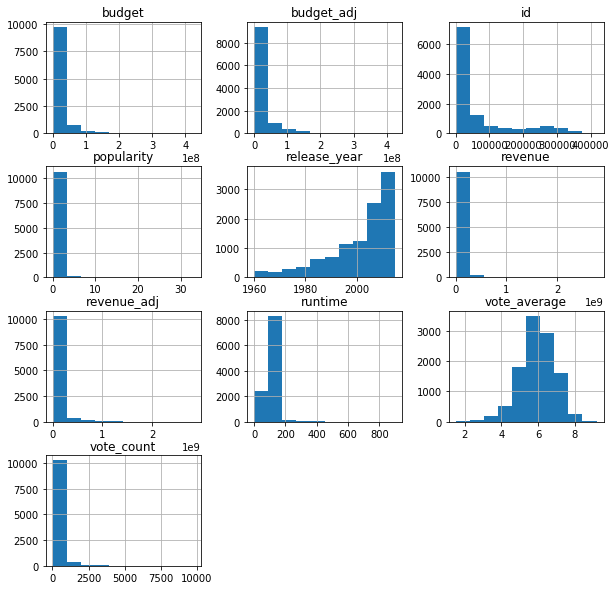

In [33]:
#make a visuals for data set 
df.hist(figsize=(10,10));

### Data Cleaning 
>here we will do some cleaing futuers to make suer that the data is good to go with it for the next stip


In [34]:
# here we delete unnecessary columns in our analysis 
df.drop(columns=(['homepage','tagline','keywords','production_companies']),inplace=True)

In [35]:
#make sure to delet all NaN calues
df.dropna(inplace=True)

In [36]:
#check if there is missing values 
df.isnull().sum(axis=0)

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [40]:
#check data shape after many cleaing process 
df.shape

(26736, 17)

In [41]:
#here we sort the data descending
df.sort_values('vote_count',ascending=False, inplace=True)

In [42]:
#spliting genres column to seprated 
df1 = df['genres'].str.split('|').apply(Series,1).stack()
df1.index = df1.index.droplevel(-1)
df1.name = 'genres'
del df['genres']
df = df.join(df1)

In [44]:
#final result for our data's table
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure


### show the unique genres in data set 

In [45]:
len(df['genres'].unique())

20

### show info about the data 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79962 entries, 0 to 10865
Data columns (total 17 columns):
id                79962 non-null int64
imdb_id           79962 non-null object
popularity        79962 non-null float64
budget            79962 non-null int64
revenue           79962 non-null int64
original_title    79962 non-null object
cast              79962 non-null object
director          79962 non-null object
overview          79962 non-null object
runtime           79962 non-null int64
release_date      79962 non-null object
vote_count        79962 non-null int64
vote_average      79962 non-null float64
release_year      79962 non-null int64
budget_adj        79962 non-null float64
revenue_adj       79962 non-null float64
genres            79962 non-null object
dtypes: float64(4), int64(6), object(7)
memory usage: 11.0+ MB


#  brief of the data cleaning section

1- i used drop and dropna to make sure the columns that has Nan values

2- sorted the data set values depand on vote_count

3- use def function to find uniqe values in geners column 

4- try to split genrs column so we can us it in dataset analysis  

<a id='eda'></a>
## Exploratory Data Analysis
> we will look up for relations between vote_count and some other variables 
### Research Question 1 (How is popularity trending over time?!)

### show spsifc cloums from the data set 

In [47]:
df3=df[['release_year','popularity','vote_average',]]
df3.head()

,release_year,popularity,vote_average
0,2015,32.985763,6.5
0,2015,32.985763,6.5
0,2015,32.985763,6.5
0,2015,32.985763,6.5
0,2015,32.985763,6.5


### find out the year with the most released number of movies 
###### why created : we need to understand the average popularity to genres its importaant to put  scope on the most popular geners and which one useres engage with it 
##### what i see : in this visual we see the viarity of genres but the most popular was adventurer topic which mean , this genre is most watched and production companies should know that for futuer projects and if they want to focus on what users preferred

In [53]:
def barplot(df,xaxis ,yaxis):
    #set
    plt.figure(figsize=(18,8))
    sns.barplot(data = df , x = xaxis ,y = yaxis,orient='h');
    plt.title(f'Average {xaxis} by {yaxis}'.title())

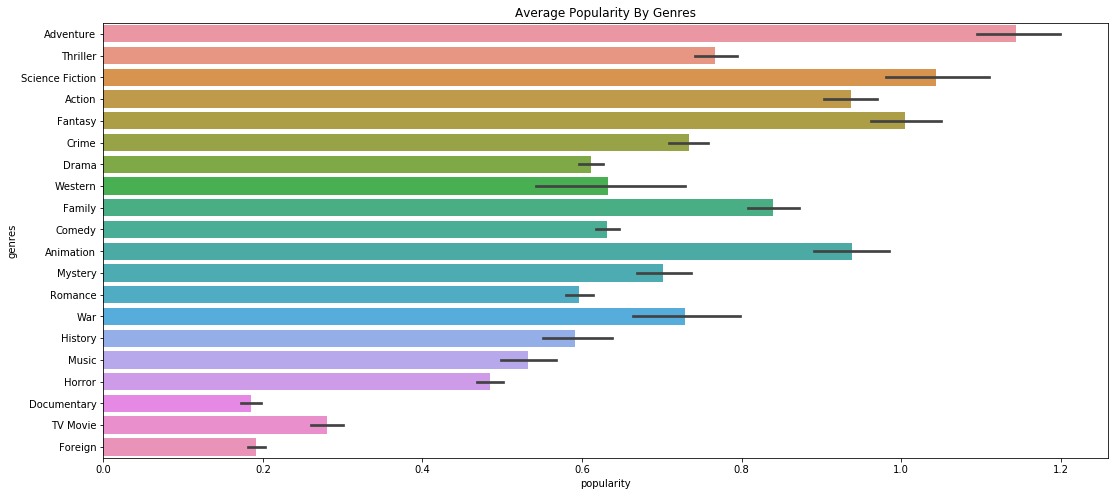

In [54]:
barplot(df,'popularity','genres')

### find what is the most year was the movies voted based on the vote_count number


In [55]:
df[(df['vote_count']<=10 ) & (df['release_year']==2014)]


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Science Fiction
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Action
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Horror
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Science Fiction
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Action
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Horror
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Science Fiction
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Action
963,249260,tt2622826,0.389417,0,0,Avalanche Sharks,Alexander Mendeluk|Kate Nauta|Benjamin Easterd...,Scott Wheeler,A group of skiers are terrorized during spring...,82,1/1/14,10,3.8,2014,0.000000e+00,0.0,Horror
973,275985,tt3608654,0.354648,0,0,The Coed and the Zombie Stoner,Catherine Annette|Jamie Noel|Grant O'Connell|B...,Glenn Miller,When a sorority girl falls in love with a zomb...,91,4/18/14,10,3.9,2014,0.000000e+00,0.0,Comedy


### here we find what is the unique geners on the data set 


In [56]:
df['genres'].value_counts(ascending=False).nunique()

20

### the most common geners per vote_average  
###### why created : we created this chart to know if there is any realtion between vote_average and genres and if there is any  paternes 
###### what i see : here we use vote_average to make an acurate searche about the users voting  and how they are voting , we can also make a categorization to the users  vote  (i.e from 1 to 3 voted on Drama ,Comdy ,Fantasy from 3 ro 6 voted on westren,familt,romance 

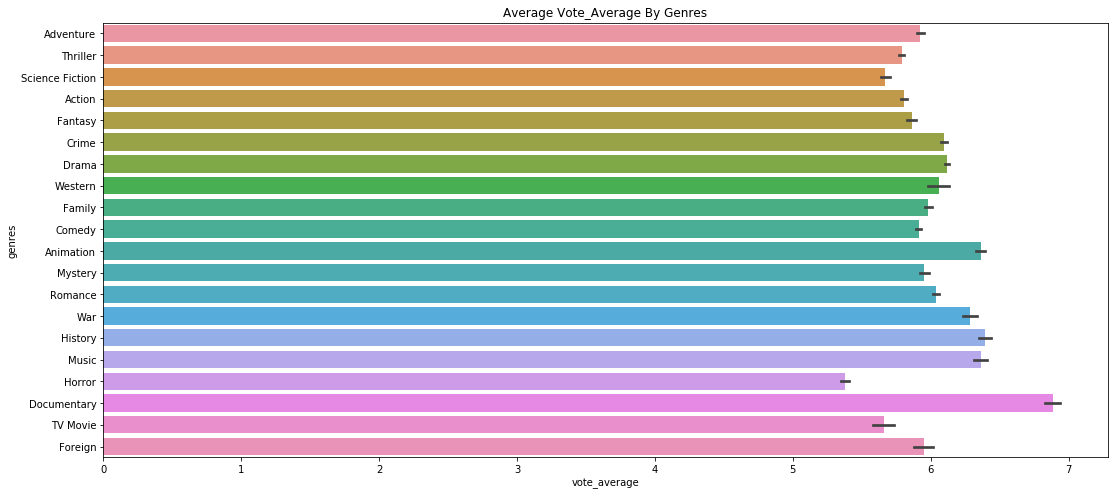

In [57]:
barplot(df,'vote_average','genres')

### the most generes has a vote_count 


###### why created : we need to track how users can change counted  vote counts and what will reflect on preferred kinds genres 
###### what i see : there is adifferance between vote_count and vote_average  and this cuse scattered about results we can solve that with 2 ways.

###### 1 we can sperat each reaslt from vote_count and vote_average and working on them eperatly  
###### 2 trying to filter and validate the data in so we can get better and same result from it

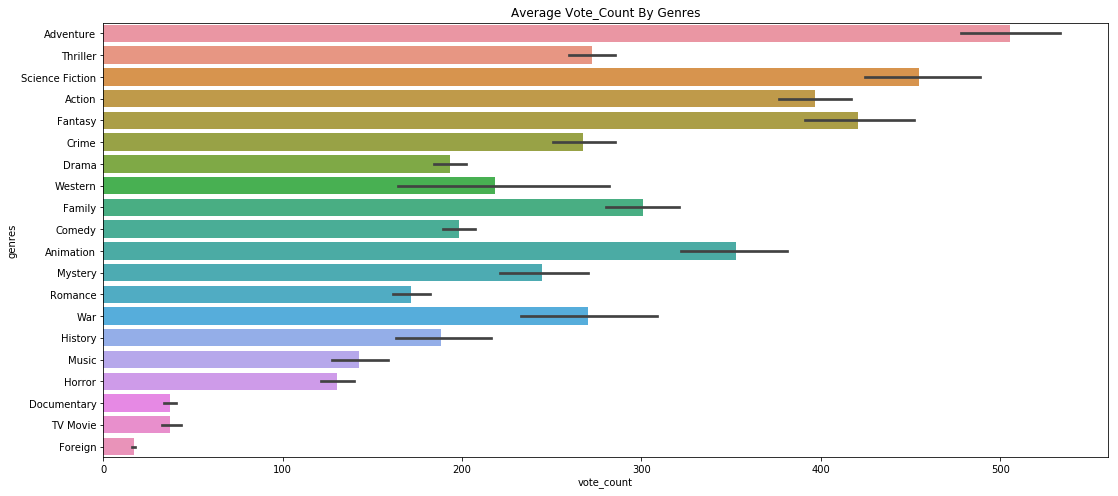

In [58]:
barplot(df,'vote_count','genres')

### Research Question 2  (How is runtime trending over time ?)

> here we see that vote_average its not depand on vote count it dosn't work like more vote_count make vote_average average increase 


### select the relavent columns to the analysis 


In [59]:
df1 = df[['original_title','runtime','release_year','popularity','genres']]
df1.sort_values('release_year',ascending=False)
df1.head()

,original_title,runtime,release_year,popularity,genres
0,Jurassic World,124,2015,32.985763,Adventure
0,Jurassic World,124,2015,32.985763,Thriller
0,Jurassic World,124,2015,32.985763,Science Fiction
0,Jurassic World,124,2015,32.985763,Action
0,Jurassic World,124,2015,32.985763,Adventure


### show the number of columns and the rows


In [60]:
df1.shape

(79962, 5)

### delete the duplicate values in the data set 

In [61]:
df1.drop_duplicates(keep='first').shape

(26731, 5)

### extract geners and making sorting for it  

In [62]:
df2 = (pd.DataFrame(df1.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=False )
df2.head(1000)


,original_title
genres,
Drama,4656
Comedy,3731
Thriller,2836
Action,2326
Romance,1681
Horror,1579
Adventure,1435
Crime,1336
Science Fiction,1195


###  here the final reasult  as shown geners sorted in visuals  

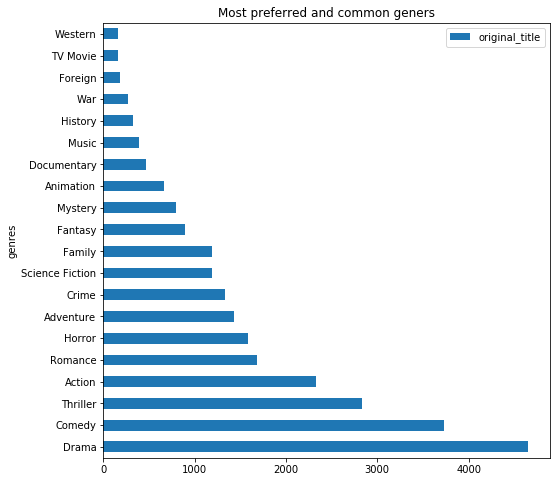

In [63]:
df2[['original_title']].plot.barh(stacked=True, title = 'Most preferred and common geners', figsize=(8, 8));


## Conclusions
> we started to make some steps to read and view the data then i started to make and decided to take 1 dependent variable and 3 other independant 

## Limitations
>  we saw some issues in data ,a differance in vote_average and vote_count so we focused on this and tried to find out the reason
 we sorted the values in descending order based on the vote_average and see any diffreant ,result: vote average not related to vote_count, and more details about the visual association between vote_average and number of run time show less than 100 
time have a hieher vote count but all the run times is bigger than 100 time have a lower vote count and only way to handle each result separately
---so after creating the insights and visuals that the runtime don't affect the rate average and vote count.
Other limitations :
we couldn't use scatter plot charts as X and Y should be numeric and it wouldn't be produced a useful and accurate result like barcharts 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])